# Проверка Центральной предельной теоремы

Импортруем необходимые в работе библиотеки и инструменты построения графиков

In [1]:
%reset -f
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import scipy.stats as sts
import math
#%matplotlib inline

Выберем для работы какое-то случайно распределение. В данном случае выбрано трапецевидное распределение (в библиотеке - функция scipy.stats.trapz).

In [2]:
#В качестве параметров формы распределения возьмем указанные значения 0.1, 0.9
c, d = 0.1, 0.9
dist = sts.trapz(c, d, loc=0, scale=1)
dist = sts.triang(loc=0.00, c=0.16, scale=1.00)#(loc=0, scale=1)
print (dist)

Сгенерируем из него выборку объема 1000

In [3]:
sample = dist.rvs(1000)

Построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения нашей случайной величины

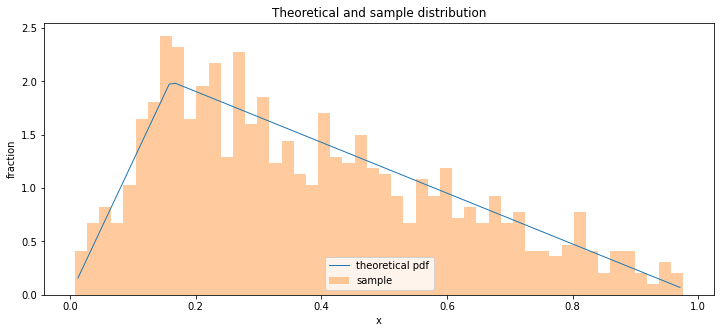

In [4]:
fig, ax=plt.subplots()
fig.set_size_inches(12, 5)
ax.set_ylabel('fraction')
ax.set_xlabel('x')
ax.set_title(u'Theoretical and sample distribution')

x = np.linspace(dist.ppf(0.001), dist.ppf(0.999),100)

ax.plot(x, dist.pdf(x), lw=1, label='theoretical pdf')
ax.hist(sample, density=True, bins=50, histtype='stepfilled', alpha=0.4, label='sample')

ax.legend(loc='lower center')
plt.show()

Далее оценим работу Центральной предельной теоремы. Для этого с помощью выбранного случаного распределения сгенерируем 1000 выборок объёма 5, 10 и 50 случайных значений.

In [5]:
# создадим массивы типа np.ndarray для хранения трех выборок, каждый размером 1000
sam_avg3 = np.ndarray([1000])
sam_avg5 = np.ndarray([1000])
sam_avg10 = np.ndarray([1000])
sam_avg50 = np.ndarray([1000])

# заполним их значениями СРЕДНЕЙ из 5, 10 и 50 случайных значений
for i in range(1000):
    sam_avg3[i] = dist.rvs(3).mean()
    sam_avg5[i] = dist.rvs(5).mean()
    sam_avg10[i] = dist.rvs(10).mean()
    sam_avg50[i] = dist.rvs(20).mean()
    #print (sam_avg50[i])

Посчитаем значения параметров нормальных распределений (среднее, дисперсия), которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Используем теоретические среднее и дисперсию нашей случайной величины.

In [6]:
#мат ожидание - одинаковое для трех выборок
m = dist.mean()
print (m)

#дисперсия - корень из квадрата отклонения деленного на объем выборки - по центральной предельной теореме
q3 = math.sqrt(dist.std()*dist.std()/3.0)
q5 = math.sqrt(dist.std()*dist.std()/5.0)
q10 = math.sqrt(dist.std()*dist.std()/10.0)
q50 = math.sqrt(dist.std()*dist.std()/20.0)

#сгенерируем три нормальных распределения с полученными значениями параметров (среднее, дисперсия)
dnorm3 = sts.norm(loc=m, scale=q3)
dnorm5 = sts.norm(loc=m, scale=q5)
dnorm10 = sts.norm(loc=m, scale=q10)
dnorm50 = sts.norm(loc=m, scale=q50)

0.38666666666666666


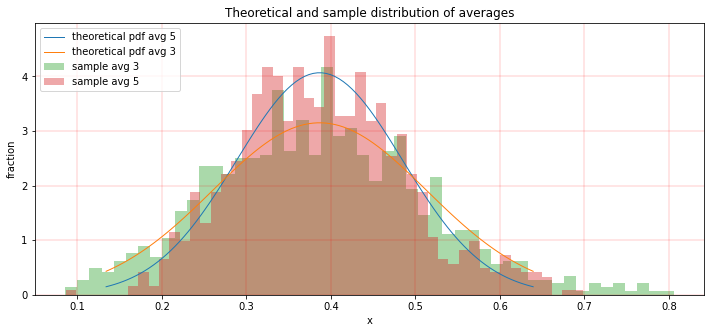

In [7]:
#создаем график, задаем его свойства
fig1, ax1 = plt.subplots()
fig1.set_size_inches(12, 5)
ax1.set_ylabel('fraction')
ax1.set_xlabel('x')
#ax1.set_ylim(0, 12)
ax1.set_title(u'Theoretical and sample distribution of averages')
ax1.grid(color='r', linestyle='-', linewidth=0.2)

#строим кривую полученного теоретического распределения dnorm5 
#и нормированную гистограмму выборки средних из 5 значений 
x1 = np.linspace(dnorm5.ppf(0.005), dnorm5.ppf(0.995),100)
ax1.plot(x1, dnorm5.pdf(x1), lw=1, label='theoretical pdf avg 5')
ax1.plot(x1, dnorm3.pdf(x1), lw=1, label='theoretical pdf avg 3')
ax1.hist(sam_avg3, bins=50, density=True, histtype='stepfilled', alpha=0.4, label='sample avg 3')
ax1.hist(sam_avg5, bins=50, density=True, histtype='stepfilled', alpha=0.4, label='sample avg 5')

ax1.legend(loc='upper left')
plt.show()

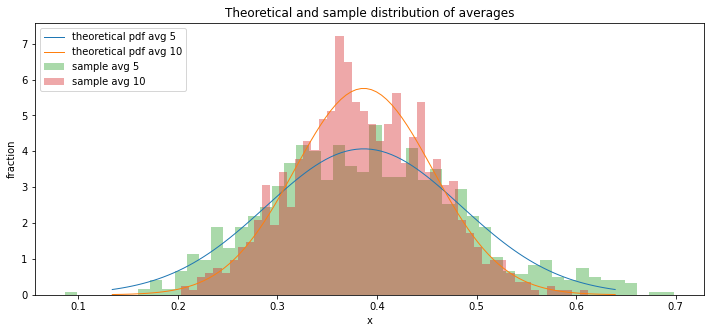

In [8]:
#добавляем кривую полученного теоретического распределения dnorm10 
#и нормированную гистограмму выборки средних из 10 значений 
fig1, ax1 = plt.subplots()
fig1.set_size_inches(12, 5)
#x1 = np.linspace(dnorm10.ppf(0.001), dnorm10.ppf(0.999),100)
ax1.set_ylabel('fraction')
ax1.set_xlabel('x')
ax1.set_title(u'Theoretical and sample distribution of averages')

ax1.plot(x1, dnorm5.pdf(x1), lw=1, label='theoretical pdf avg 5')
ax1.plot(x1, dnorm10.pdf(x1), lw=1, label='theoretical pdf avg 10')
ax1.hist(sam_avg5, bins=50, density=True, histtype='stepfilled', alpha=0.4, label='sample avg 5')
ax1.hist(sam_avg10, bins=50, density=True, histtype='stepfilled', alpha=0.4, label='sample avg 10')
ax1.legend(loc='upper left')
plt.show()

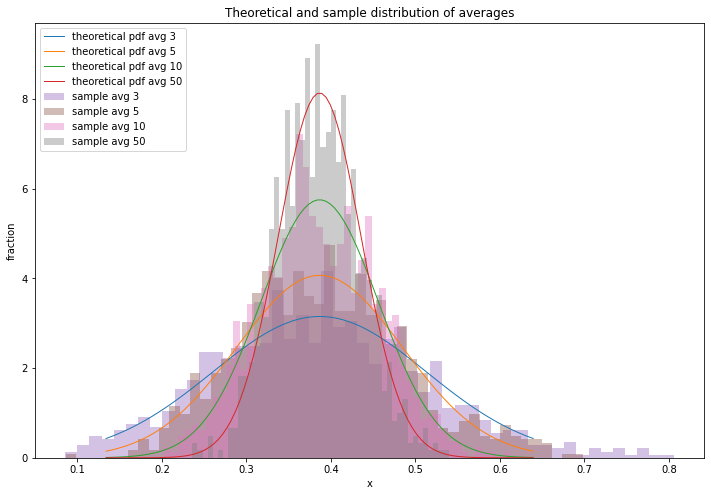

In [9]:
#добавляем кривую полученного теоретического распределения dnorm50 
#и нормированную гистограмму выборки средних из 50 значений 
fig1, ax1 = plt.subplots()
fig1.set_size_inches(12, 8)
#x1 = np.linspace(dnorm10.ppf(0.001), dnorm10.ppf(0.999),100)
ax1.set_ylabel('fraction')
ax1.set_xlabel('x')
ax1.set_title(u'Theoretical and sample distribution of averages')

ax1.plot(x1, dnorm3.pdf(x1), lw=1, label='theoretical pdf avg 3')
ax1.plot(x1, dnorm5.pdf(x1), lw=1, label='theoretical pdf avg 5')
ax1.plot(x1, dnorm10.pdf(x1), lw=1, label='theoretical pdf avg 10')
ax1.plot(x1, dnorm50.pdf(x1), lw=1, label='theoretical pdf avg 50')

ax1.hist(sam_avg3, bins=50, density=True, histtype='stepfilled', alpha=0.4, label='sample avg 3')
ax1.hist(sam_avg5, bins=50, density=True, histtype='stepfilled', alpha=0.4, label='sample avg 5')
ax1.hist(sam_avg10, bins=50, density=True, histtype='stepfilled', alpha=0.4, label='sample avg 10')
ax1.hist(sam_avg50, bins=50, density=True, histtype='stepfilled', alpha=0.4, label='sample avg 50')
ax1.legend(loc='upper left')
plt.show()

Выводы: 
1. Наглядно видно действие Центральной предельной теоремы - распределения выборочных средних очень хорошо описываются полученными нормальными распределениями с теоретически рассчитанными параметрами.
2. Очевидно, что с ростом объема выборки снижается дисперсия распределения выборочных средних. Таким образом, выборочное среднее более точно описывает характер изначальной выборки с ростом объема выборки.